In [1]:
library(dplyr)
library(tabplot)
library(discretization)
library(pryr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:base’:

    xor

Loading required package: ff
Attaching package ff
- getOption("fftempdir")=="/var/folders/_2/zt45knw57_qcq4gjpnjkq33c0000gn/T//RtmpB6ZiUO"

- getOption("ffextension")=="ff"

- getOption("ffdrop")==TRUE

- getOption("fffinonexit")==TRUE

- getOption("ffpagesize")==65536

- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes

- getOption

In [2]:
target = "../data/middle/sp.csv"
output = "../data/middle/sp5.csv"

In [3]:
L <- function(..., f) {
    if (missing(f)) 
        f <- paste(rep("%s", length(c(...))), collapse = "")
    sprintf(fmt = f, ...)
}

In [4]:
jRoadType <- c("都市間高速", "都市高速", "有料道路", "国道", "県道", "主要地方道", "一般道1、一般道2、一般道3", "その他")

In [5]:
raw <- read.csv(target, stringsAsFactors=FALSE)
df <- raw

In [6]:
names(df)

[1] "Time"              "Longitude"         "Latitude"         
 [4] "Speed"             "Brake"             "Accel"            
 [7] "Engine"            "AheadDistance"     "SteeringAngle"    
[10] "BranchFlag"        "DistTollgate"      "RoadType"         
[13] "GreenLamp"         "RedLamp"           "RightLamp"        
[16] "UpLamp"            "LeftLamp"          "StopSign"         
[19] "Limit30Sign"       "Limit50Sign"       "BrakeCar"         
[22] "LeftCar"           "ManBicycleCount"   "ManBicycle"       
[25] "DistManBicycle"    "Pitch"             "DistSignal"       
[28] "PathType"          "LaneCount"         "AccelerationSpeed"
[31] "Jerk"              "TimeHeadway"       "TimeToCollision"  
[34] "RiskFactor"        "flag"

In [7]:
invalids <- c('Time', 'Longitude', 'Latitude', 'Brake', 'Accel', 'flag', 'Curve100', 'Curve150')

In [8]:
availColumns <- c('Speed', 'AheadDistance', 'AverageVelocity', 'TimeHeadway', 'RoadType', 'TimeToCollision', 'RiskFactor',
                  'CurveAverage', 'Curve', 'Engine', 'Pitch', 'SteeringAngle', 'DistSignal', 'AccelerationSpeed', '', 'Jerk', 'PathType')

In [9]:
automateColumns <- c("Speed", "AheadDistance", "CurveAverage", "DistSignal", "Pitch", "TimeHeadway", "", "AccelerationSpeed", "Jerk", "Curve", "Engine")
manualColumns <- c("AverageVelocity", "RiskFactor", "SteeringAngle", "Pitch")

In [10]:
highOuter <- function(firstQu, thirdQu) thirdQu + 1.5*(thirdQu - firstQu)
lowOuter <- function(firstQu, thirdQu) firstQu - 1.5*(thirdQu - firstQu)

# Threshold

In [11]:
thresholdOrIdentity <- function(operator, threshold, val) {
    if (do.call(operator, list(val, threshold)))
        return(val)
    return(threshold)
}

# DistSignal

Saving 7 x 7 in image


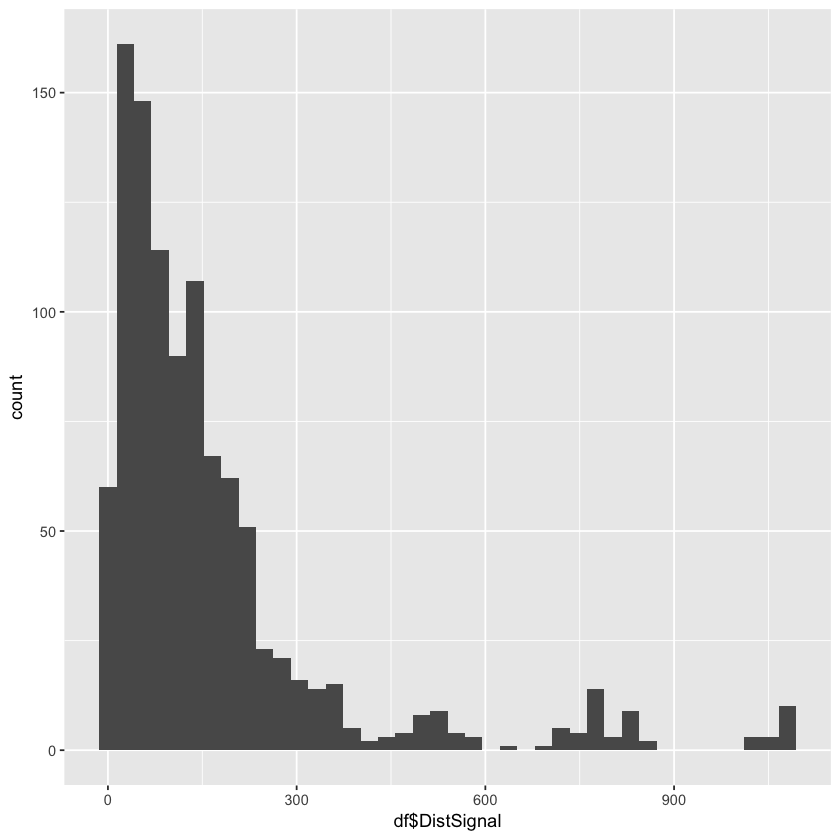

In [12]:
p <- qplot(df$DistSignal, geom="histogram", bins=40)
ggsave(p, file="DistSignal-pre.png")
print(p)

In [13]:
df$DistSignal <- sapply(df$DistSignal, FUN=pryr::partial(thresholdOrIdentity, "<", 300))
summary(df$DistSignal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.22   49.11  109.00  128.90  192.80  300.00 

Saving 7 x 7 in image


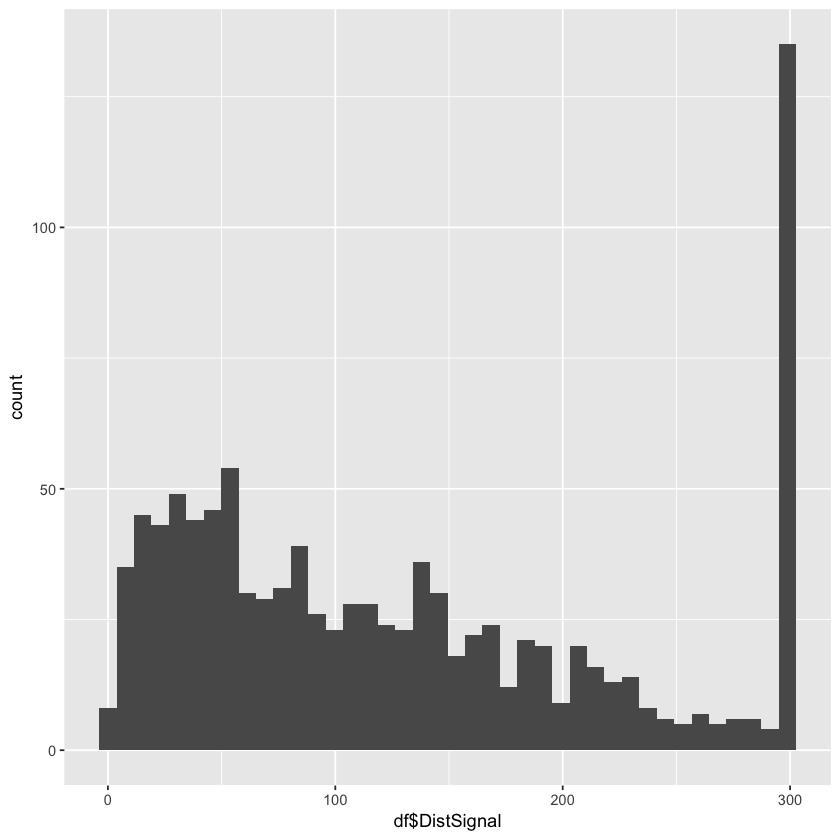

In [14]:
p <- qplot(df$DistSignal, geom="histogram", bins=40)
ggsave(p, file="DistSignal-post.png")
print(p)

# Engine

Saving 7 x 7 in image


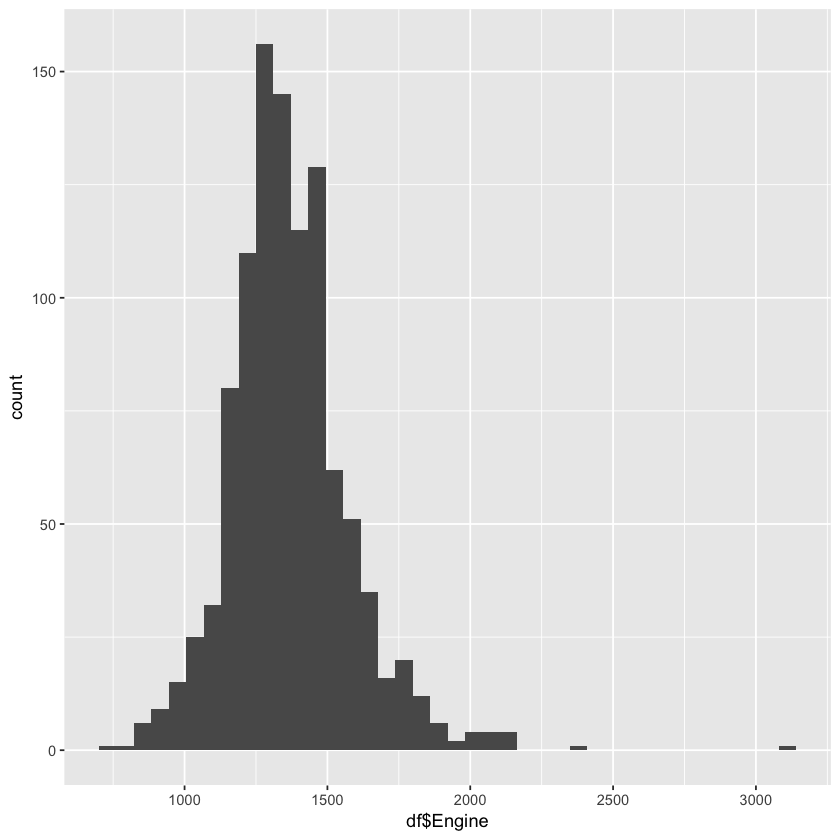

In [15]:
p <- qplot(df$Engine, geom="histogram", bins=40)
ggsave(p, file="Engine-pre.png")
print(p)

In [16]:
df$Engine <- sapply(df$Engine, FUN=pryr::partial(thresholdOrIdentity, "<", 2000))
summary(df$Engine)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  731.2  1241.0  1347.0  1365.0  1472.0  2000.0 

Saving 7 x 7 in image


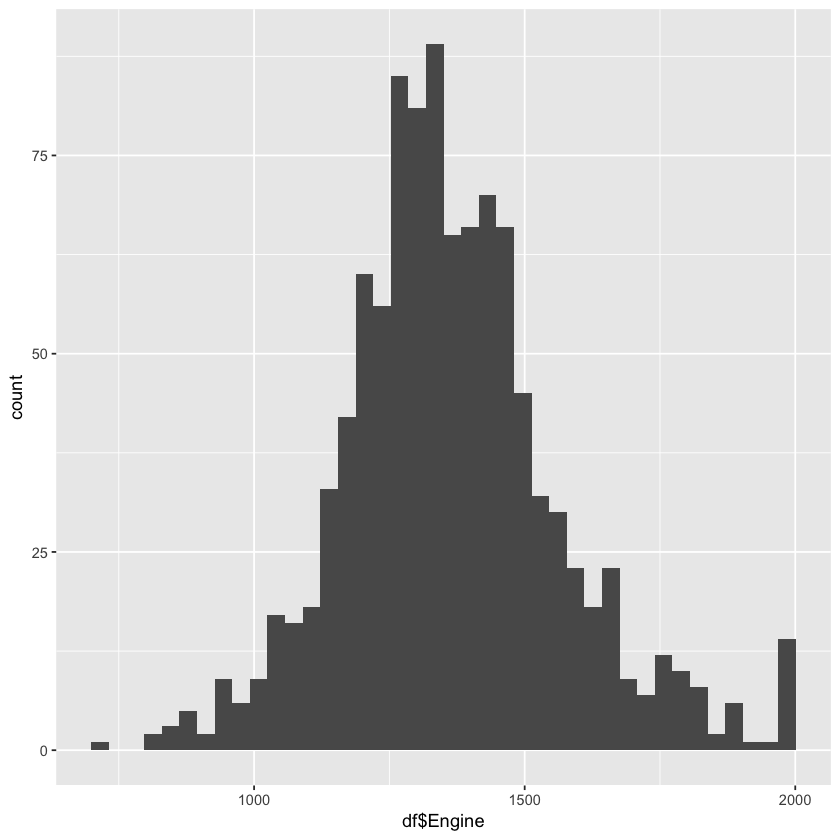

In [17]:
p <- qplot(df$Engine, geom="histogram", bins=40)
ggsave(p, file="Engine-post.png")
print(p)

# PathType ( VC_NaviCls )

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


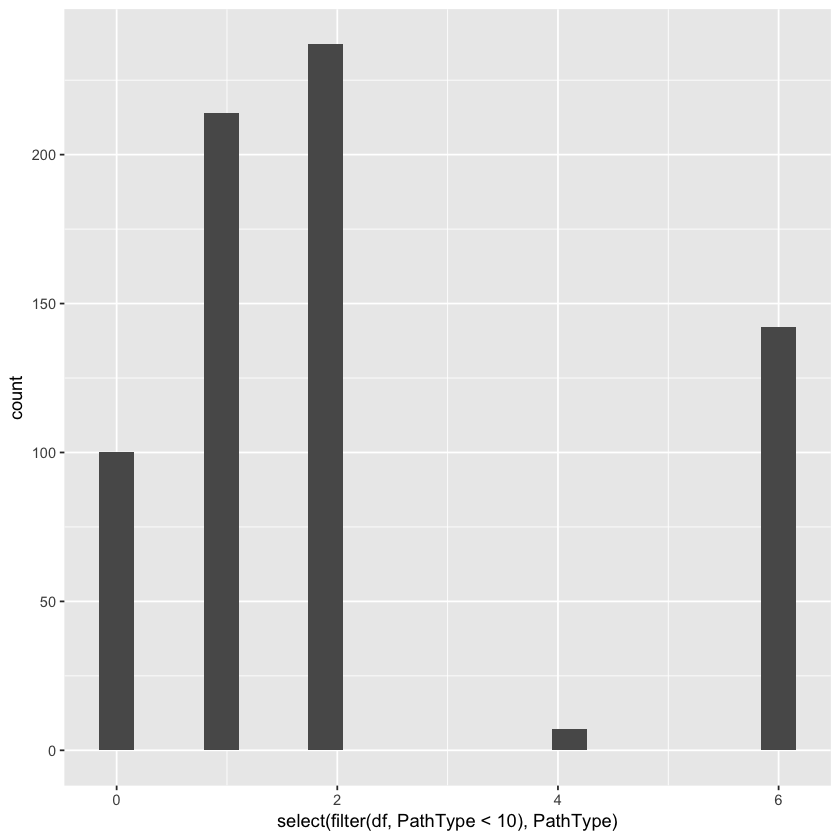

In [18]:
p <- qplot(select(filter(df, PathType < 10), PathType), geom="histogram", bins=20)
print(p)

# Pitch

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-2.4870000 -0.0768700  0.0002488 -0.0039820  0.0403000  2.4840000 

Saving 7 x 7 in image


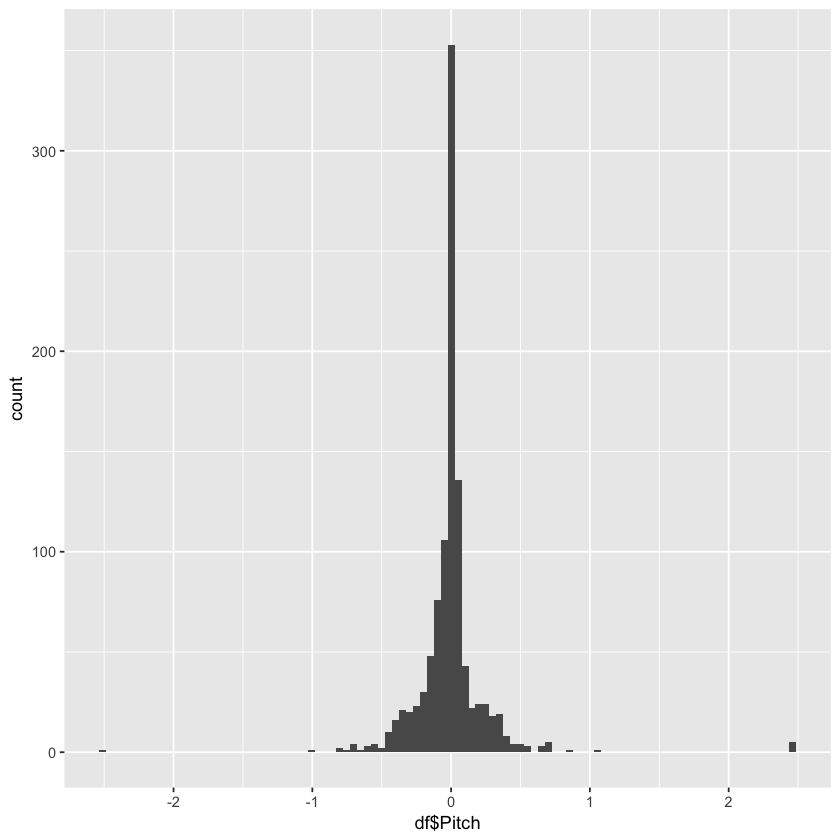

In [19]:
summary(df$Pitch)
p <- qplot(df$Pitch, geom="histogram", bins=100)
ggsave(p, file="Pitch-pre.png")
print(p)

In [20]:
df$Pitch <- sapply(df$Pitch, FUN=pryr::partial(thresholdOrIdentity, "<", 1))
df$Pitch <- sapply(df$Pitch, FUN=pryr::partial(thresholdOrIdentity, ">", -1))
summary(df$Pitch)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.0000000 -0.0768700  0.0002488 -0.0097070  0.0403000  1.0000000 

Saving 7 x 7 in image


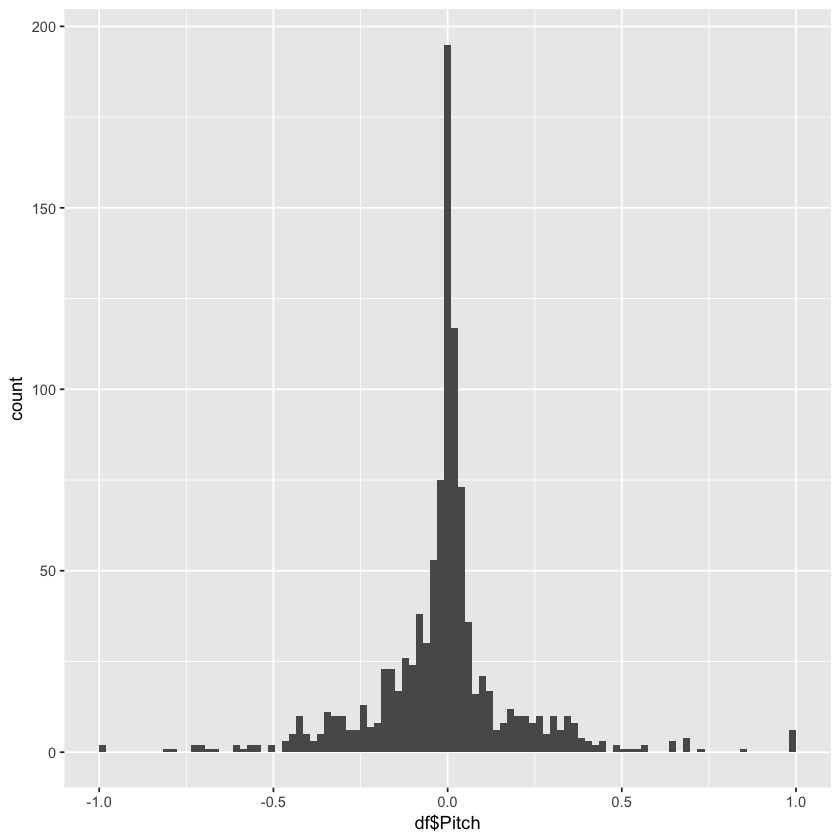

In [21]:
p <- qplot(df$Pitch, geom="histogram", bins=100)
ggsave(p, file="Pitch-post.png")
print(p)

# SteeringAngle

Saving 7 x 7 in image


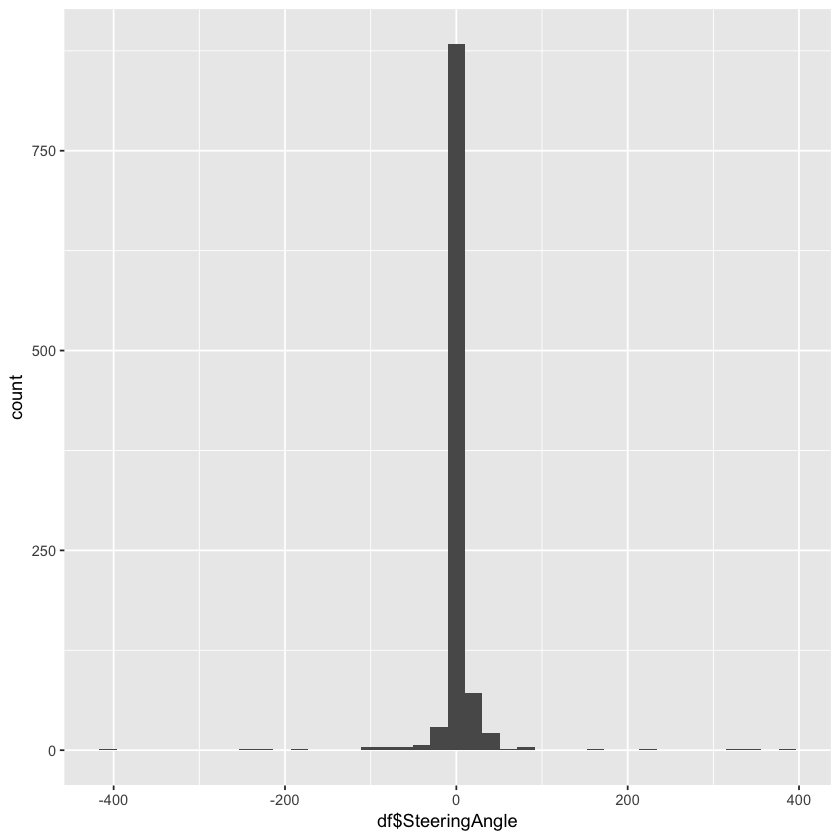

In [22]:
p <- qplot(df$SteeringAngle, geom="histogram", bins=40)
ggsave(p, file="SteeringAngle-pre.png")
print(p)

In [23]:
df$SteeringAngle <- sapply(df$SteeringAngle, FUN=pryr::partial(thresholdOrIdentity, "<", 180))
df$SteeringAngle <- sapply(df$SteeringAngle, FUN=pryr::partial(thresholdOrIdentity, ">", -180))
summary(df$SteeringAngle)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-180.000    1.400    3.000    3.184    4.900  180.000 

Saving 7 x 7 in image


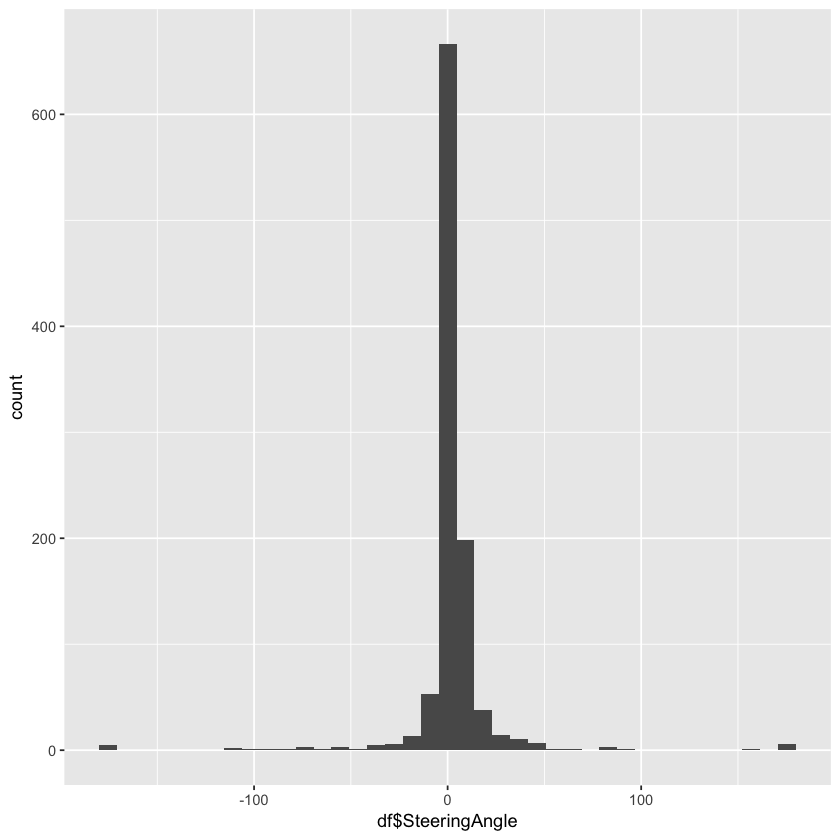

In [24]:
p <- qplot(df$SteeringAngle, geom="histogram", bins=40, xlim = c(-180, 180))
ggsave(p, file="SteeringAngle-post.png")
print(p)

# AheadDistance

Saving 7 x 7 in image


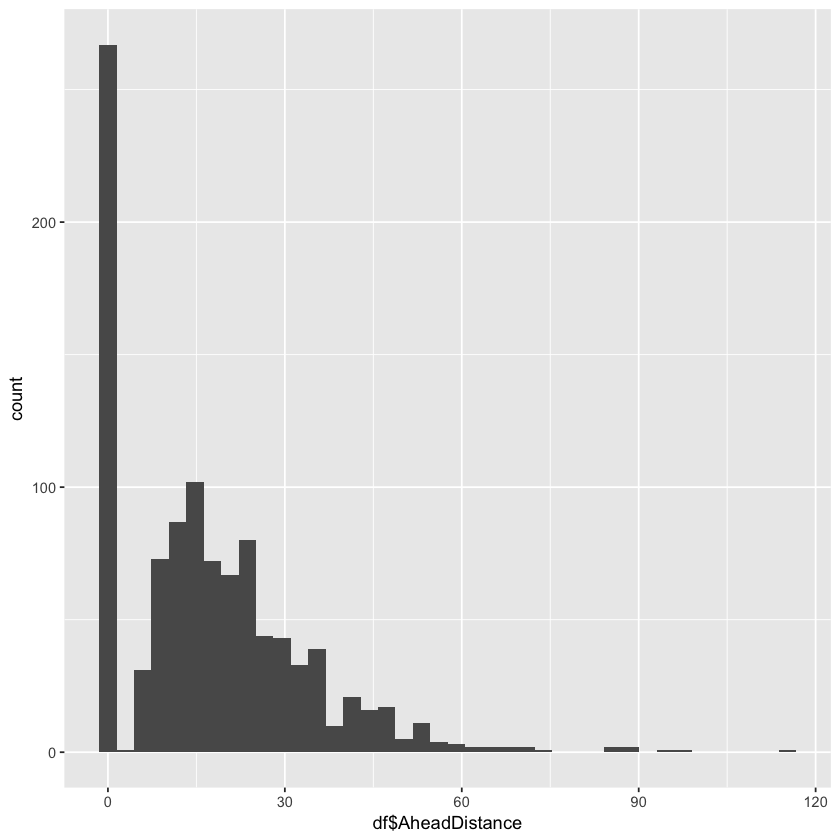

In [25]:
p <- qplot(df$AheadDistance, geom="histogram", bins=40)
ggsave(p, file="AheadDistance-pre.png")
print(p)

In [26]:
df$AheadDistance <- sapply(df$AheadDistance, FUN=pryr::partial(thresholdOrIdentity, "<", 90))
df$AheadDistance[df$AheadDistance == 0] <- 90
summary(df$AheadDistance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.20   15.30   25.50   40.37   90.00   90.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.20   15.30   25.50   40.37   90.00   90.00 

Saving 7 x 7 in image


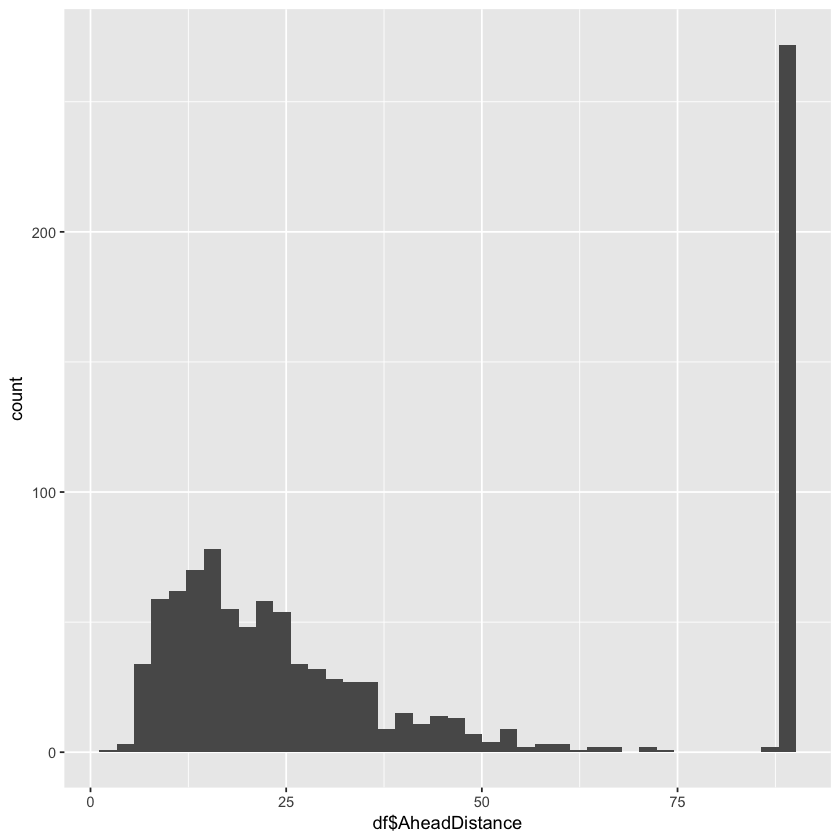

In [27]:
summary(df$AheadDistance)
p <- qplot(df$AheadDistance, geom="histogram", bins=40)
ggsave(p, file="AheadDistance-post.png")
print(p)

# Speed

In [28]:
summary(df$Speed)
p1 <- qplot(df$Speed, geom="histogram", bins=100, xlim=c(0, 120), main="Speed")
# ggsave(p1, file="AllSpeed.png")
# print(p1)

for (i in c(0, 2, 3, 4, 5, 6, 7)) {
    px <- qplot(df %>% filter(RoadType == i) %>% select(Speed), geom="histogram", bins=40, xlim=c(0, 120), xlab=i, main="Speed")
    # ggsave(plot=px, file=L(f="Speed-%d.png", i))
    # print(px)  
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.89   22.93   35.56   36.78   46.45  105.80 

# AverageVelocity

In [29]:
summary(df$AverageVelocity)
p1 <- qplot(df$AverageVelocity, geom="histogram", bins=50, xlim=c(0, 120), main="AverageVelocity")
# ggsave(p1, file="AllAverageVelocity.png")
# print(p1)

for (i in c(0, 2, 3, 4, 5, 6, 7)) {
    px <- qplot(df %>% filter(RoadType == i) %>% select(AverageVelocity), geom="histogram", bins=50, xlim=c(0, 120), xlab=i, main="AverageVelocity")
    # ggsave(plot=px, file=L(f="AverageVelocity-%d.png", i))
    # print(px)  
}

Length  Class   Mode 
     0   NULL   NULL 

# MaxSpeed

In [30]:
summary(df$MaxSpeed)
p1 <- qplot(df$MaxSpeed, geom="histogram", bins=50, xlim=c(0, 120), main="MaxSpeed")
# ggsave(p1, file="AllMaxSpeed.png")
# print(p1)

for (i in c(0, 2, 3, 4, 5, 6, 7)) {
    px <- qplot(df %>% filter(RoadType == i) %>% select(MaxSpeed), geom="histogram", bins=50, xlim=c(0, 120), xlab=i, main="MaxSpeed")
    # ggsave(plot=px, file=L(f="MaxSpeed-%d.png", i))
    # print(px)  
}

Length  Class   Mode 
     0   NULL   NULL 

# Min Speed

In [31]:
summary(df$MinSpeed)
p1 <- qplot(df$MinSpeed, geom="histogram", bins=50, xlim=c(0, 100), main="MinSpeed")
# ggsave(p1, file="AllMinSpeed.png")
# print(p1)

for (i in c(0, 2, 3, 4, 5, 6, 7)) {
    px <- qplot(df %>% filter(RoadType == i) %>% select(MinSpeed), geom="histogram", xlim=c(0, 100), bins=50, xlab=i, main="MinSpeed")
    # ggsave(plot=px, file=L(f="MinSpeed-%d.png", i))
    # print(px)  
}

Length  Class   Mode 
     0   NULL   NULL 

# TimeToCollision

Saving 7 x 7 in image


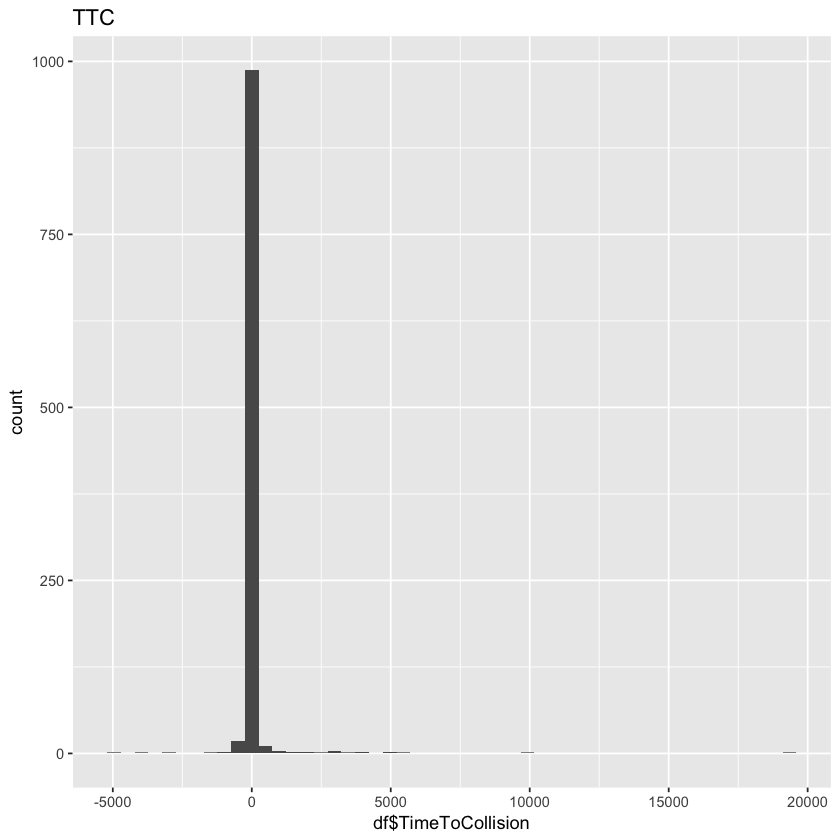

In [32]:
p1 <- qplot(df$TimeToCollision, geom="histogram", bins=50, main="TTC")
ggsave(p1, file="TTC-pre.png")
print(p1)

In [33]:
TTC <- raw$TimeToCollision
TTC <- sapply(TTC, FUN=pryr::partial(thresholdOrIdentity, ">", -250))
TTC[TTC > 0] <- 0
TTC <- abs(TTC)
TTC[TTC == 0] <- 250
df$TimeToCollision <- TTC
summary(df$TimeToCollision)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.05302  23.94000 147.30000 139.20000 250.00000 250.00000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.05302  23.94000 147.30000 139.20000 250.00000 250.00000 

Saving 7 x 7 in image


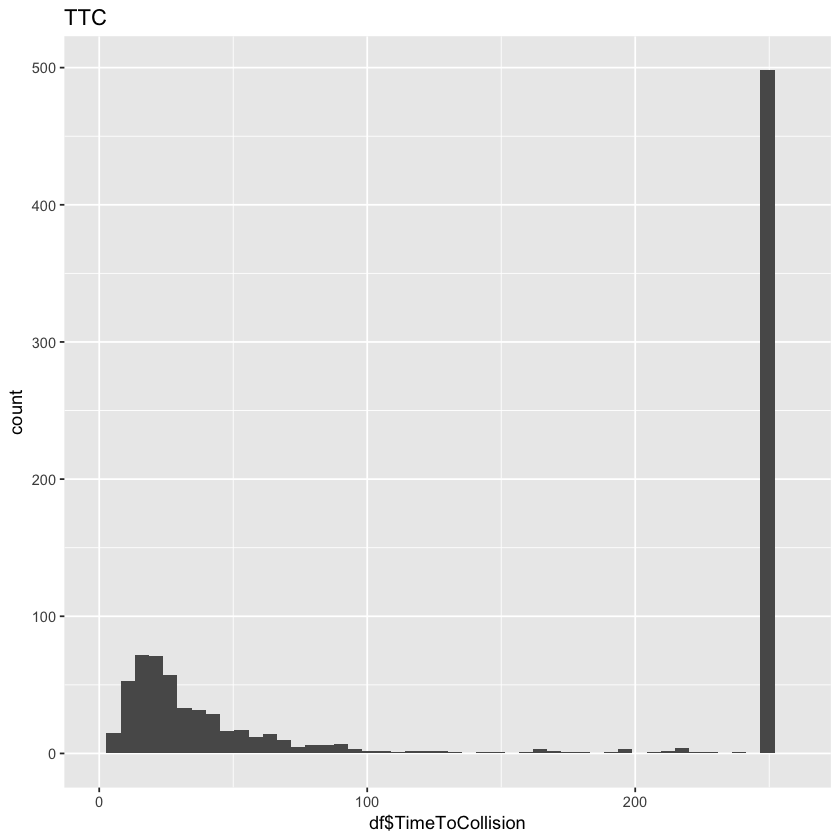

In [34]:
summary(df$TimeToCollision)
p1 <- qplot(df$TimeToCollision, geom="histogram", bins=50, xlim=c(0, 260), main="TTC")
ggsave(p1, file="TTC-post.png")
print(p1)

for (i in c(0, 2, 3, 4, 5, 6, 7)) {
    px <- qplot(df %>% filter(RoadType == i) %>% select(TimeToCollision), geom="histogram", xlim=c(0, 260), bins=50, xlab=i, main="TTC")
    # ggsave(plot=px, file=L(f="TTC-%d.png", i))
    # print(px)  
}

# TimeHeadway

In [35]:
summary(df$TimeHeadway)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.8954  1.9380  1.9170  2.7140 13.4500 

Saving 7 x 7 in image


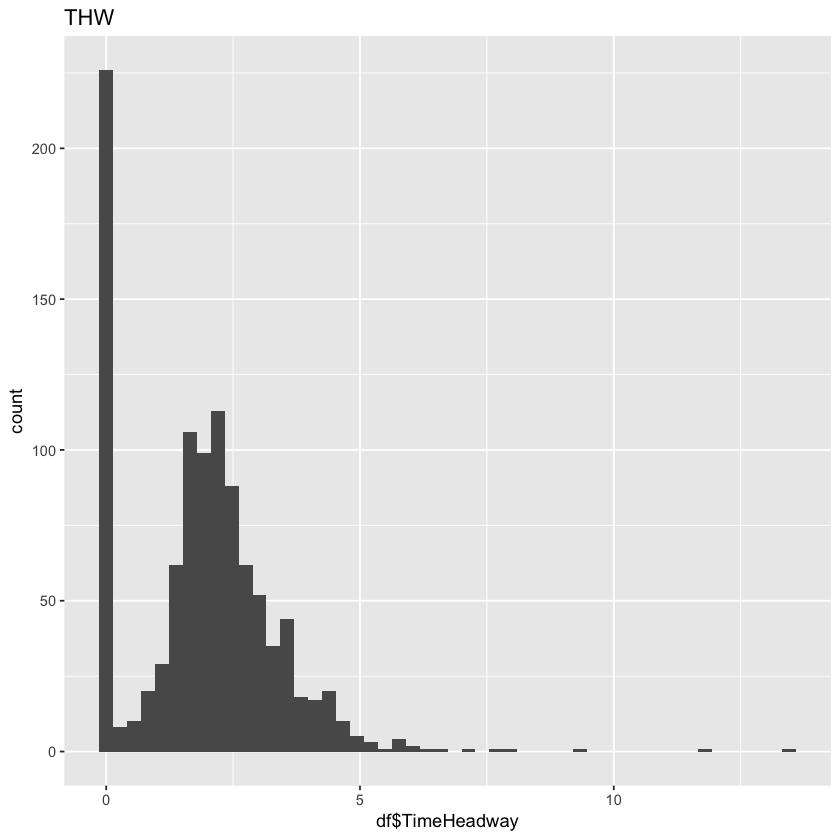

In [36]:
p1 <- qplot(df$TimeHeadway, geom="histogram", bins=50, main="THW")
ggsave(p1, file="THW-pre.png")
print(p1)

In [37]:
df$TimeHeadway[df$TimeHeadway == 0] <- 14

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.05302  1.84100  2.57000  4.94000  4.50800 14.00000 

Saving 7 x 7 in image


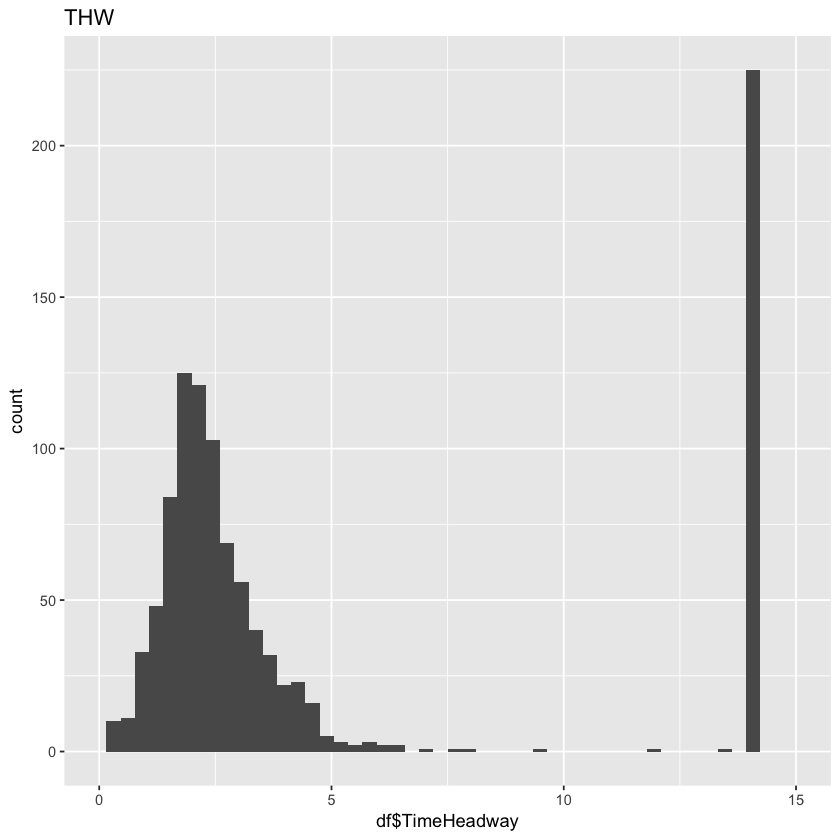

In [46]:
summary(df$TimeHeadway)
p1 <- qplot(df$TimeHeadway, geom="histogram", bins=50, xlim=c(0, 15), main="THW")
ggsave(p1, file="THW-post.png")
print(p1)

for (i in c(0, 2, 3, 4, 5, 6, 7)) {
    px <- qplot(df %>% filter(RoadType == i) %>% select(TimeHeadway), geom="histogram", xlim=c(0, 170), bins=50, xlab=i, main="THW")
    # ggsave(plot=px, file=L(f="THW-%d.png", i))
    # print(px)  
}

# RiskFactor

Saving 7 x 7 in image


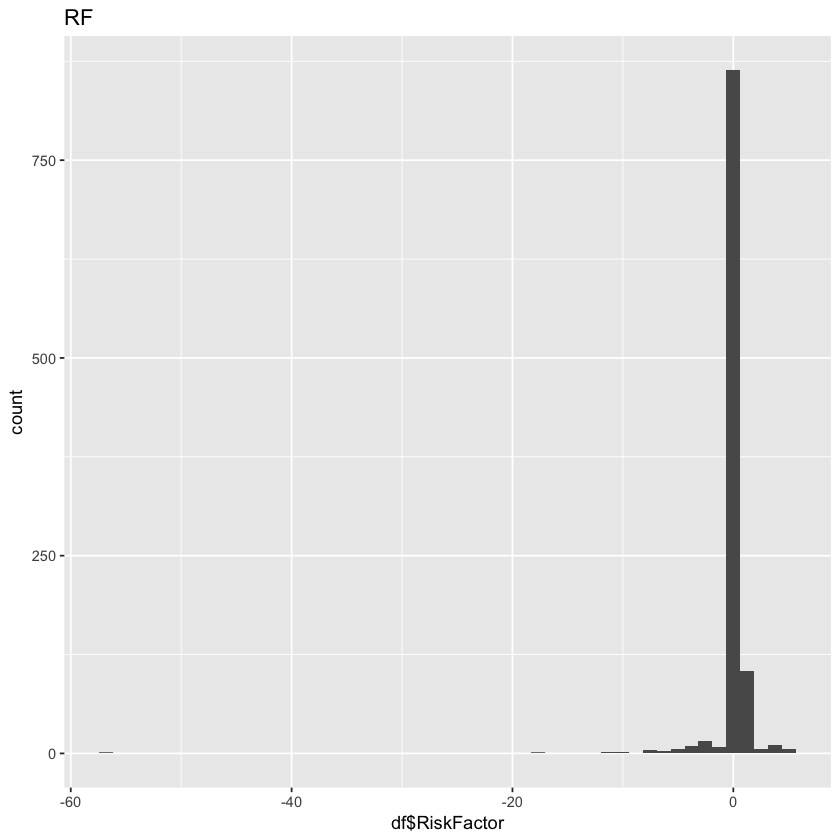

In [39]:
p1 <- qplot(df$RiskFactor, geom="histogram", bins=50, main="RF")
ggsave(p1, file="RF-pre.png")
print(p1)

In [40]:
df$RiskFactor <- 1.0/df$TimeHeadway + 4.0/df$TimeToCollision

In [41]:
df$RiskFactor <- sapply(df$RiskFactor, FUN=pryr::partial(thresholdOrIdentity, "<", highOuter(0.259, 0.888)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.08743 0.25970 0.48480 0.53550 0.69450 1.83200 

Saving 7 x 7 in image


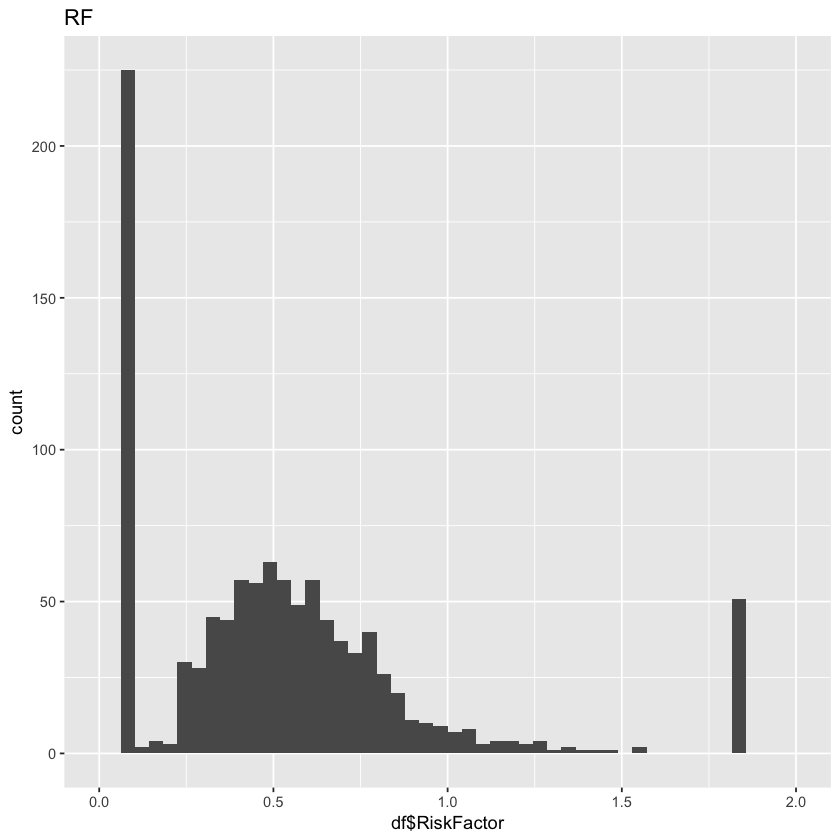

In [42]:
summary(df$RiskFactor)
p1 <- qplot(df$RiskFactor, geom="histogram", bins=50, xlim=c(0, 2), main="RF")
ggsave(p1, file="RF-post.png")
print(p1)

for (i in c(0, 2, 3, 4, 5, 6, 7)) {
    px <- qplot(df %>% filter(RoadType == i) %>% select(RiskFactor), geom="histogram", xlim=c(0, 2), bins=50, xlab=i, main="RF")
    # ggsave(plot=px, file=L(f="RF-%d.png", i))
    # print(px)  
}

# LaneCount

Saving 7 x 7 in image


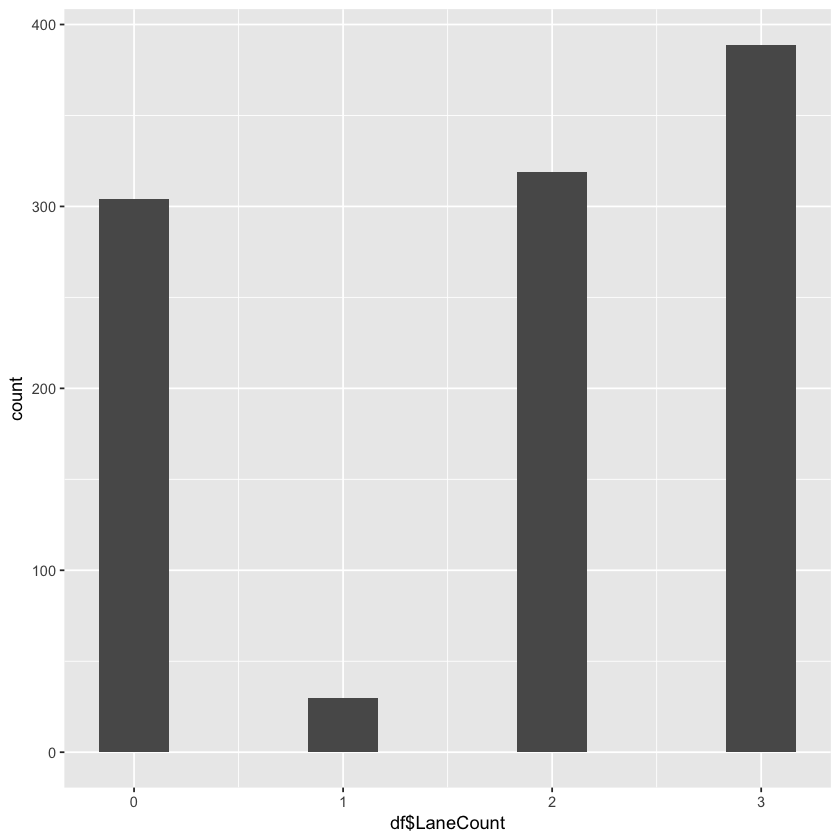

In [43]:
p1 <- qplot(df$LaneCount, geom="histogram", bins=10)
ggsave(p1, file="LaneCount-pre.png")
print(p1)

   LaneCount    
 Min.   :0.000  
 1st Qu.:0.000  
 Median :2.000  
 Mean   :1.761  
 3rd Qu.:3.000  
 Max.   :3.000  

Saving 7 x 7 in image


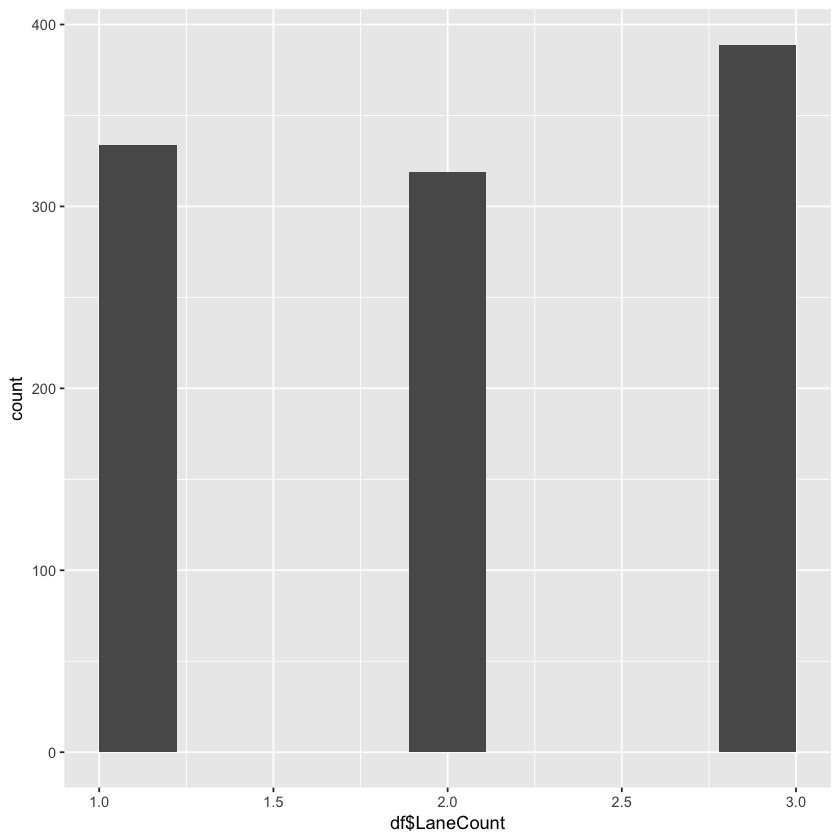

In [44]:
summary(df["LaneCount"])
df$LaneCount[df$LaneCount == 0] <- 1
p1 <- qplot(df$LaneCount, geom="histogram", bins=10)
ggsave(p1, file="LaneCount-post.png")
print(p1)

# DiffAvgSpeed

In [45]:
summary(df["DiffAvgSpeed"])
p1 <- qplot(df$DiffAvgSpeed, geom="histogram", bins=10)
print(p1)

ERROR: Error in `[.data.frame`(df, "DiffAvgSpeed"): undefined columns selected


# EmptinessOfRoad

In [ ]:
summary(df["EmptinessOfRoad"])
p1 <- qplot(df$EmptinessOfRoad, geom="histogram", bins=10)
print(p1)

# RoadFactor

In [ ]:
summary(df["RoadFactor"])
p1 <- qplot(df$RoadFactor, geom="histogram", bins=10)
print(p1)

In [ ]:
summary(df)

In [ ]:
# write.table(df, output, sep=",", col.names=TRUE, row.names=FALSE)